# Data Transformation

- if we don't want to remove outliers or to keep outliers data then instead of using z-score or other outliers treating methods we can transform our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data Diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


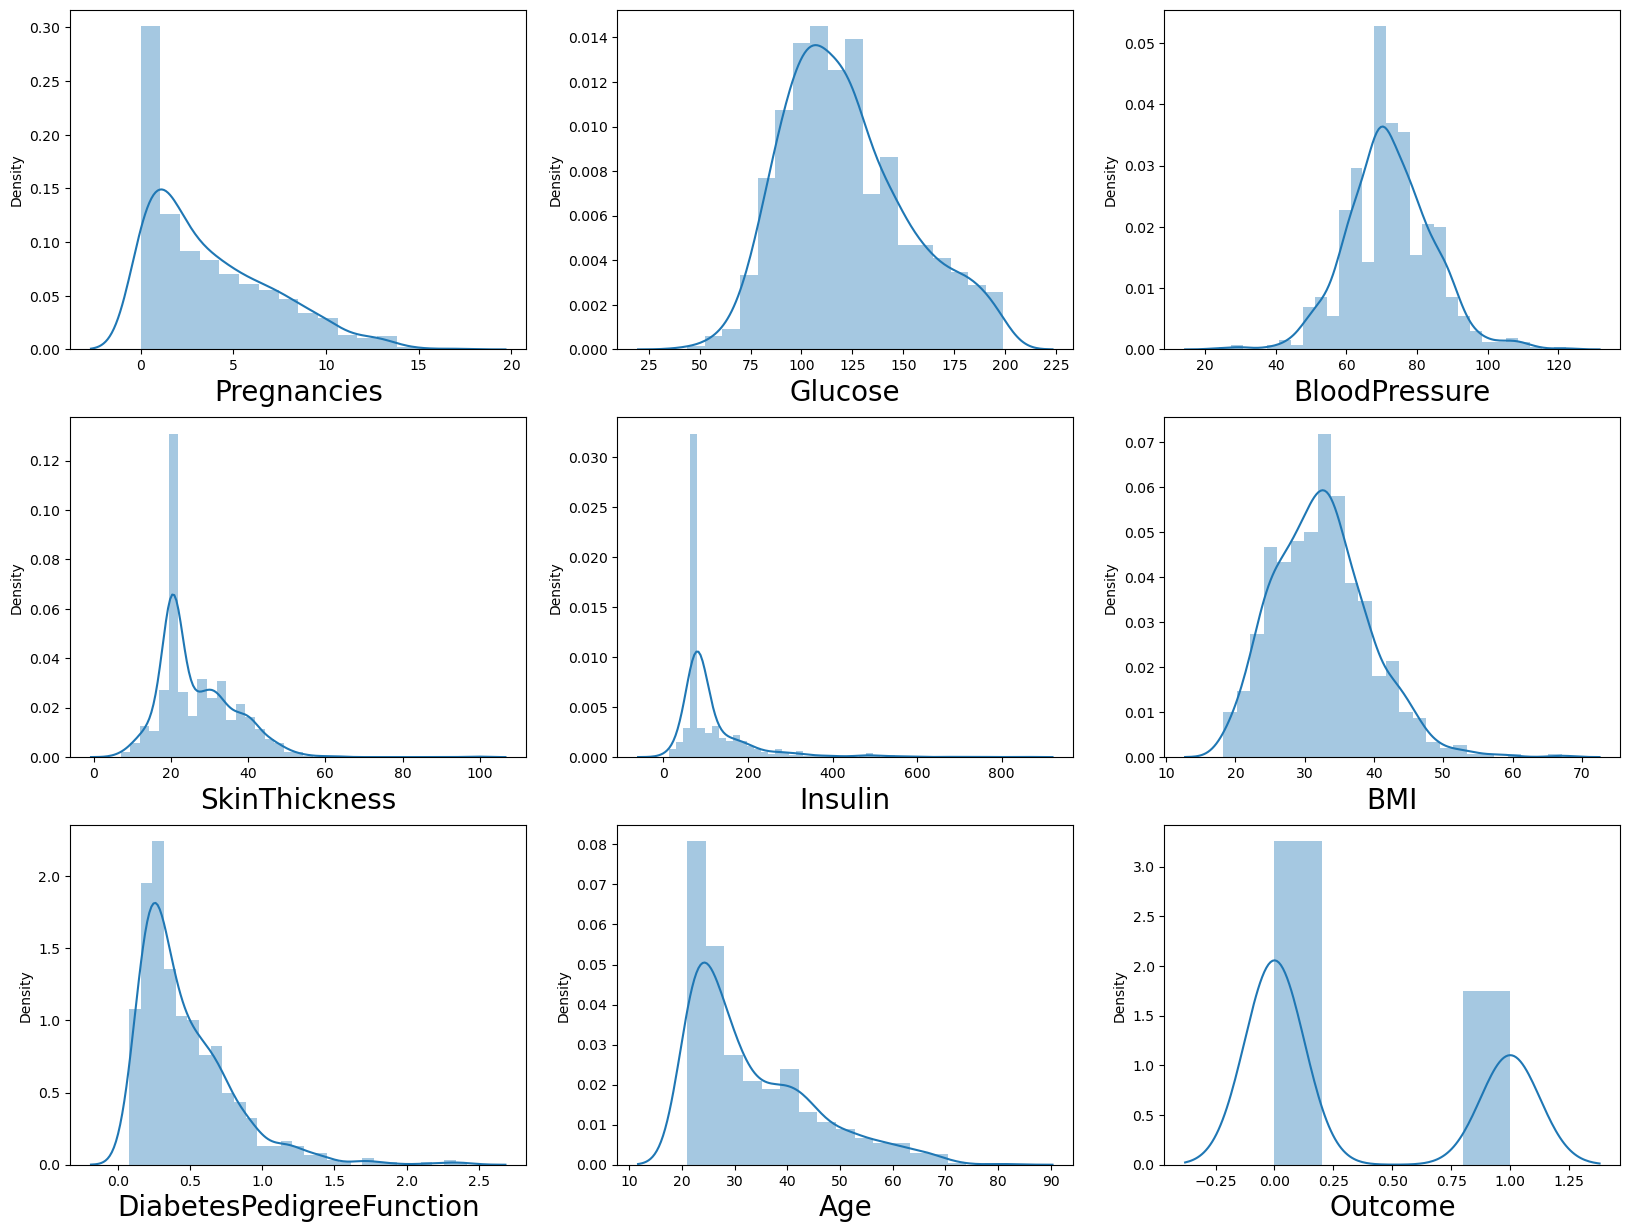

In [3]:
# let's see how data is distributed for every column

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
plt.show()

## Apply Log Transformation on continues variable

- It is primarily used to convert a skewed distribution to a normal distribution/ less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

In [4]:
data['Insulin'] = np.log(data['Insulin'])

data['BloodPressure'] = np.log(data['BloodPressure'])

data['SkinThickness'] = np.log(data['SkinThickness'])

data['BMI'] = np.log(data['BMI'])

data['DiabetesPedigreeFunction'] = np.log(data['DiabetesPedigreeFunction'])

data['Age'] = np.log(data['Age'])

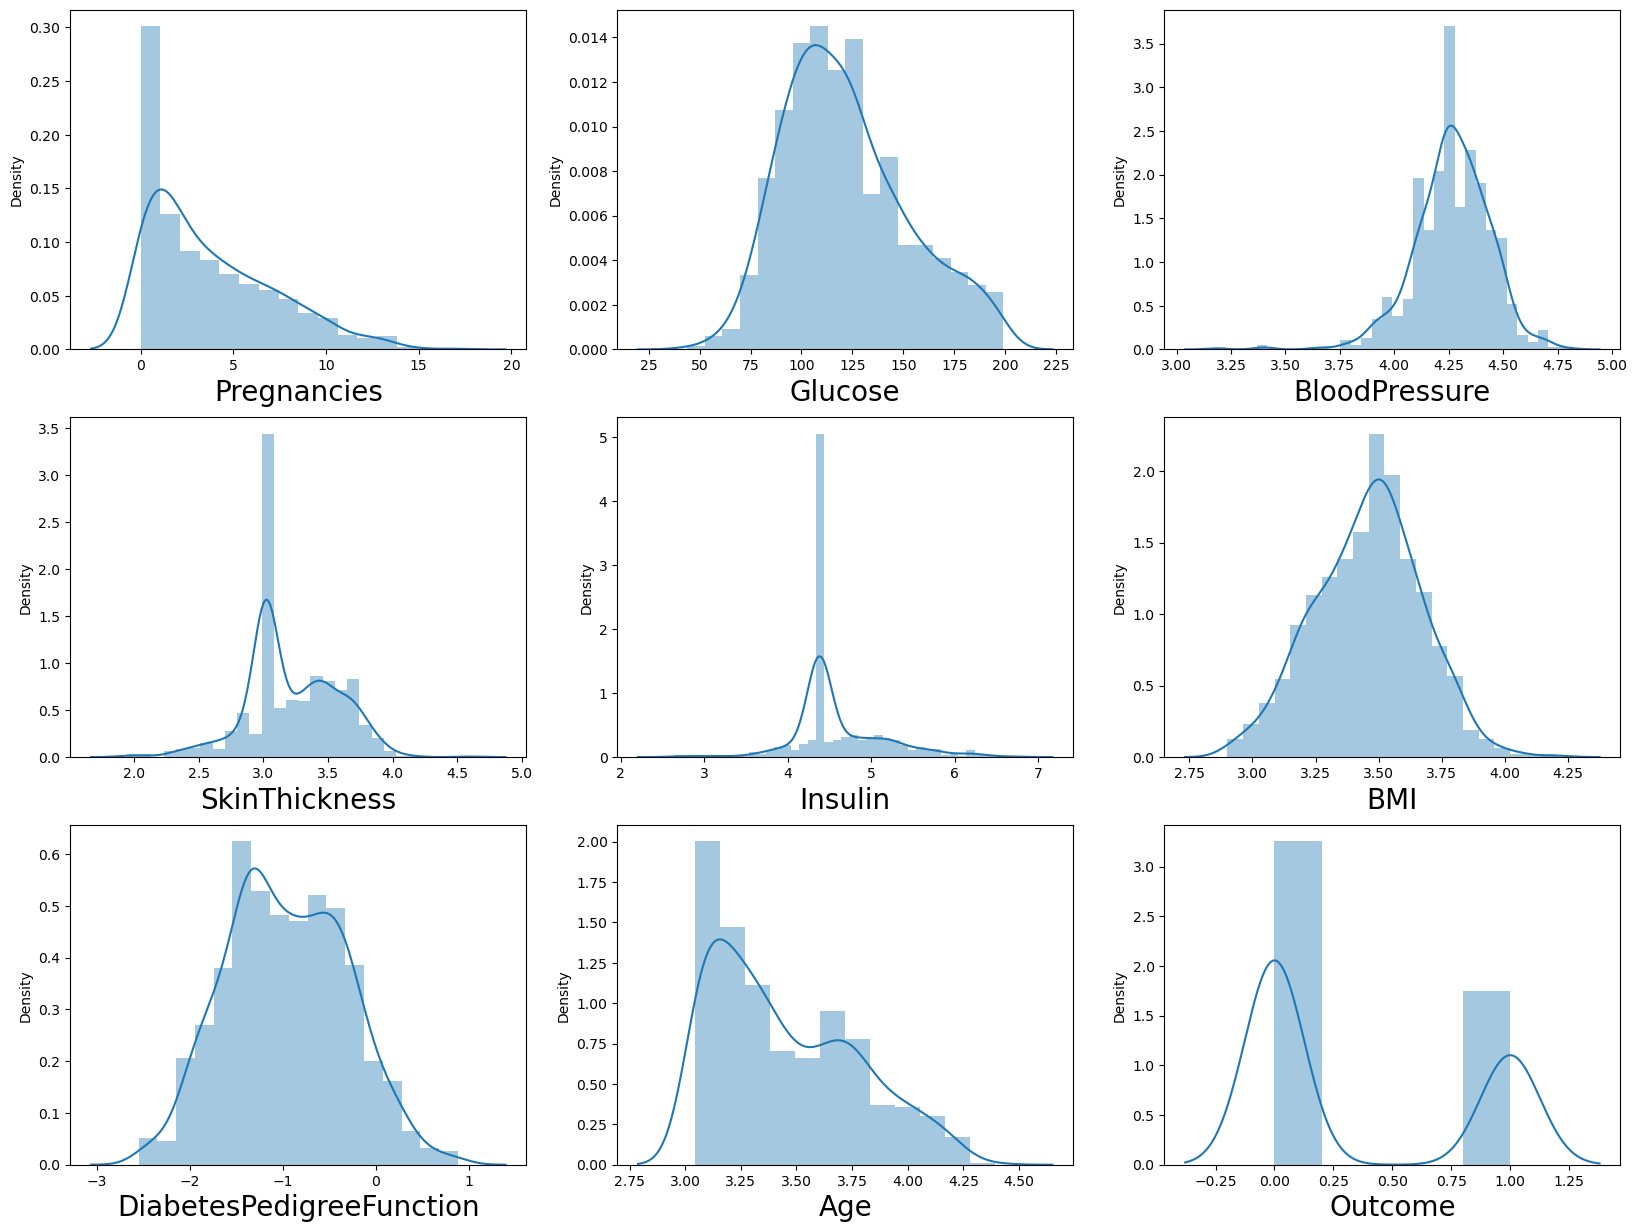

In [5]:
# let's see how data is distributed for every column

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
plt.show()

## Power transformer

- It is a data transformation technique used to stablize variance, make the data more normal distribution-like.

#### Two Method

- Box-Cox
- Yeo-Johnson

In [6]:
# Read files

data = pd.read_csv("Data Diabetes.csv")   # Reading the Data
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [7]:
features = ['Insulin', 'BMI', 'BloodPressure', 'SkinThickness', 'Age']

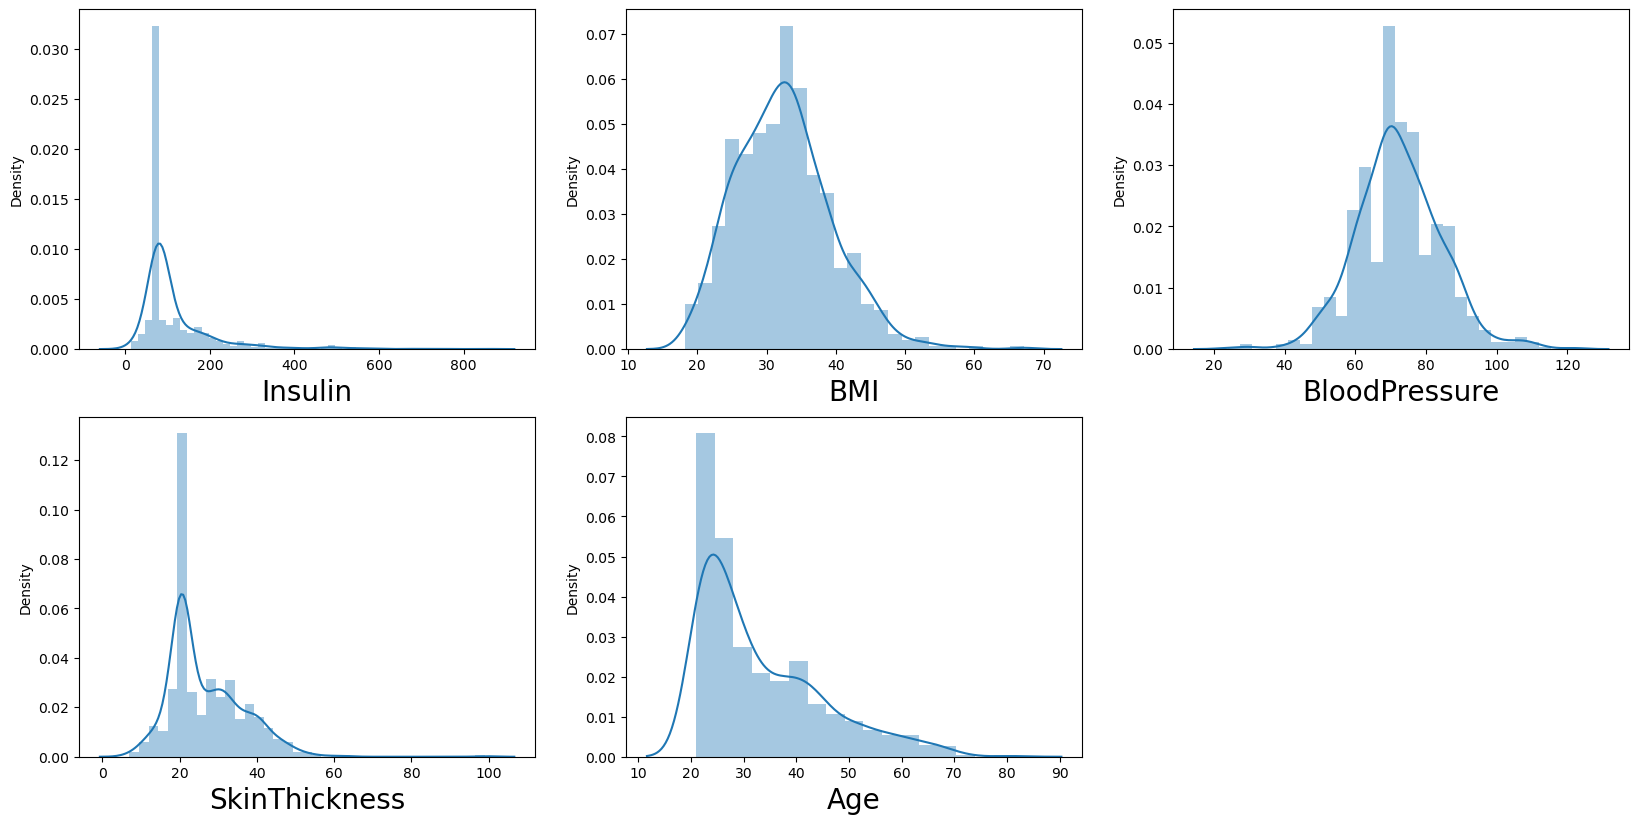

In [8]:
# let's see how data is distributed for every column

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in data[features]:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
plt.show()

### 1) Box-Cox works with only positive values( > 0)

In [9]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method = 'box-cox')

In [10]:
data[features] = scaler.fit_transform(data[features])

data[features]

,Insulin,BMI,BloodPressure,SkinThickness,Age
0,-0.350666,0.261508,-0.009147,0.956846,1.362797
1,-0.350666,-0.841776,-0.507220,0.415886,0.127990
2,-0.350666,-1.457249,-0.674630,-0.567991,0.231506
3,-0.025195,-0.584749,-0.507220,-0.246245,-1.483064
4,1.006677,1.462877,-2.750268,0.956846,0.328461
...,...,...,...,...,...
763,1.117625,0.161140,0.319657,1.873163,1.764261
764,-0.350666,0.697359,-0.174501,0.211217,-0.366775
765,0.305525,-0.912547,-0.009147,-0.246245,0.017237
766,-0.350666,-0.260838,-1.011681,-0.567991,1.236934


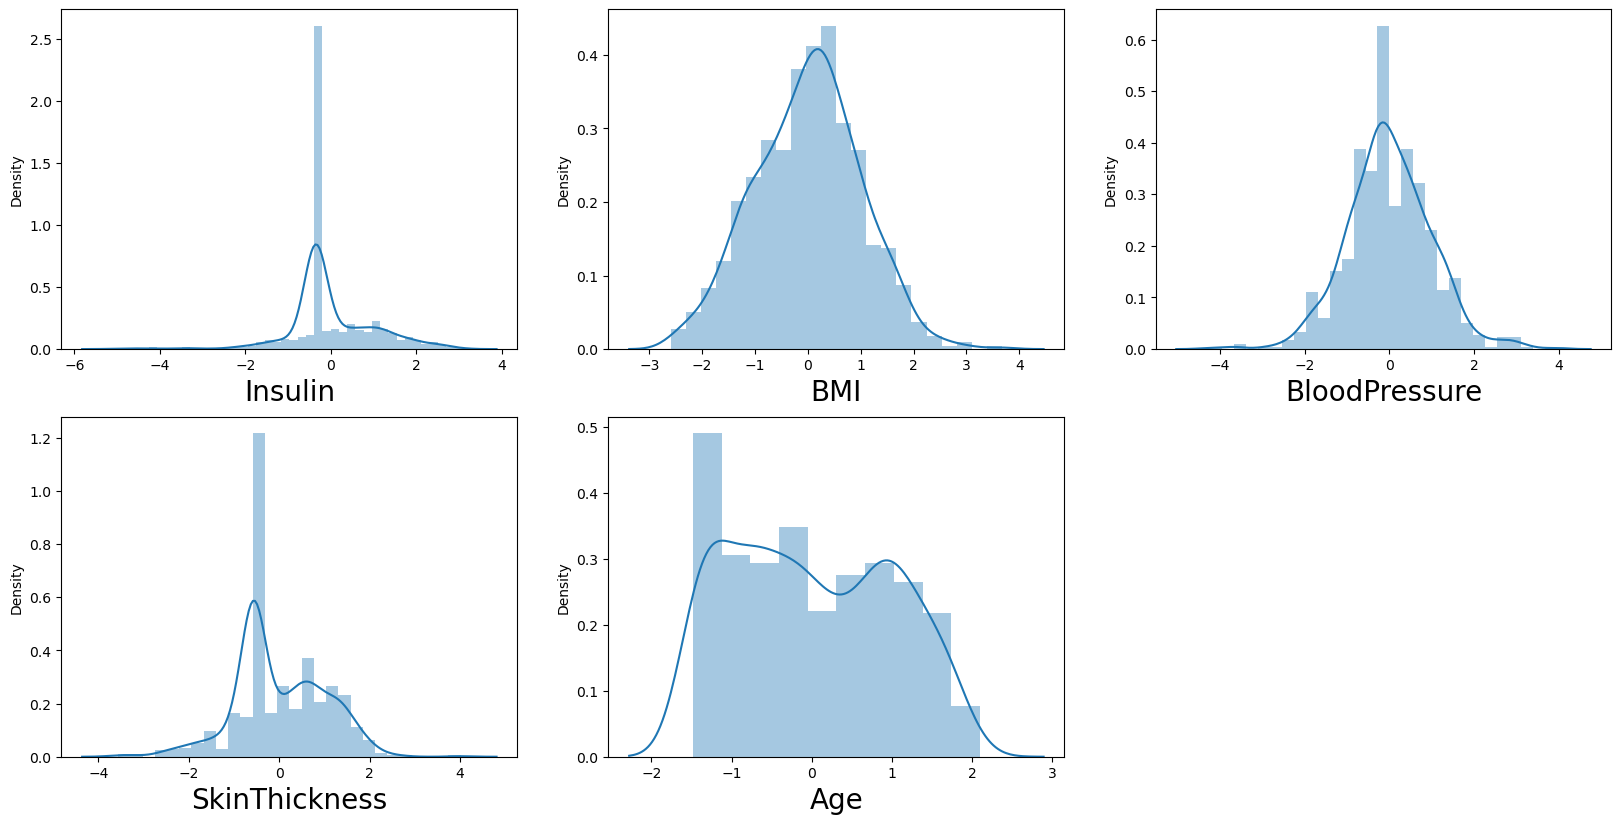

In [11]:
# let's see how data is distributed for every column after power transformer

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in data[features]:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
plt.show()

In [12]:
# Read files

data = pd.read_csv("Data Diabetes.csv")   # Reading the Data
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [13]:
features = ['Insulin', 'BMI', 'BloodPressure', 'SkinThickness', 'Age']

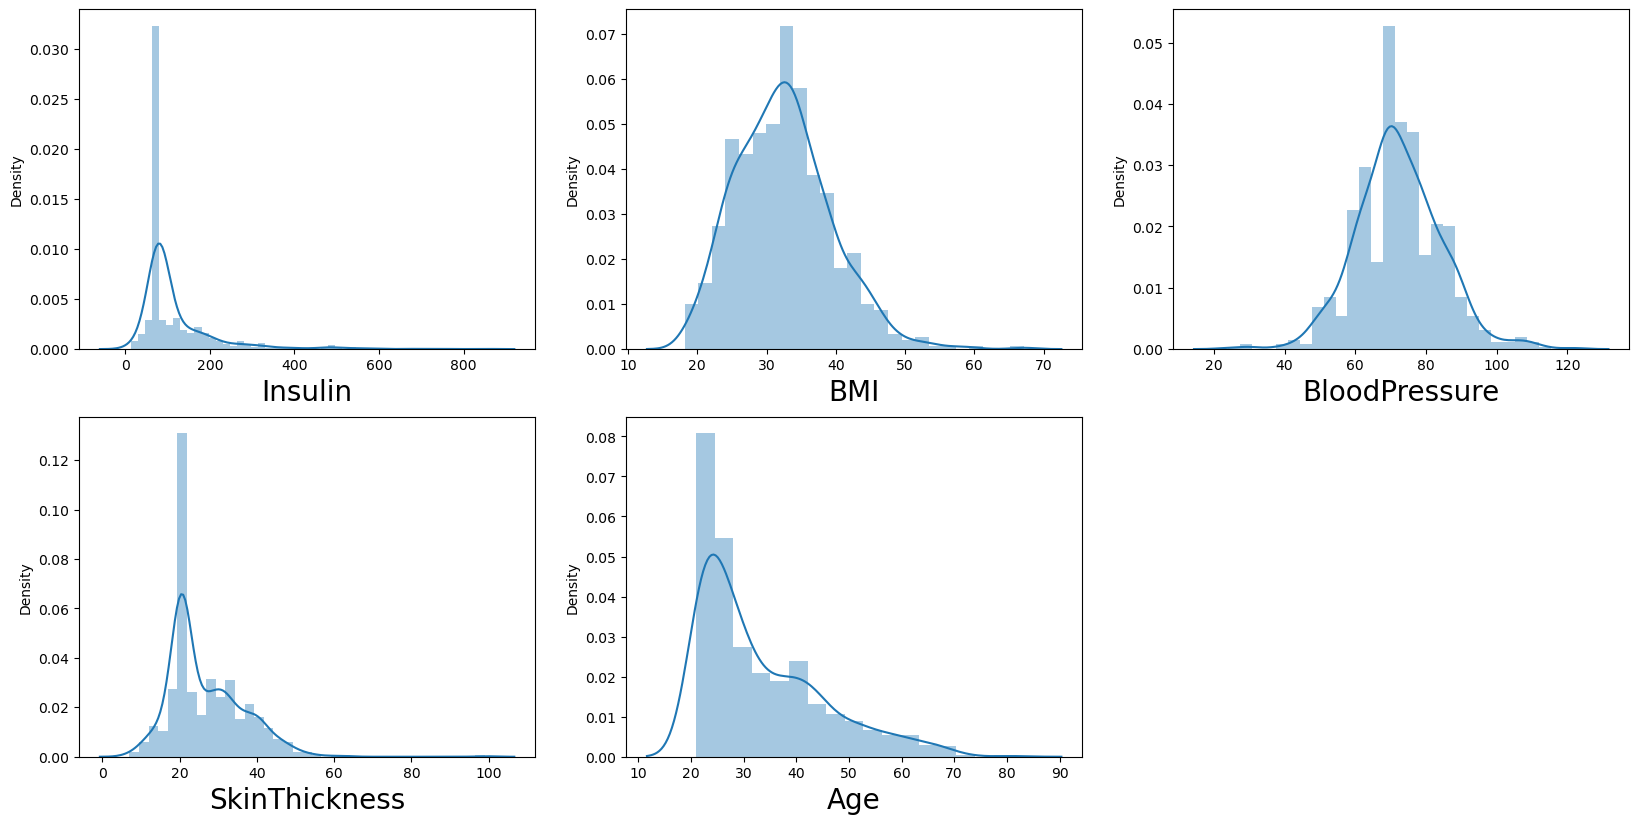

In [14]:
# let's see how data is distributed for every column after power transformer

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in data[features]:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
plt.show()

### 2) Yeo-Johnson works with both positive and negative values.

In [15]:
scaler = PowerTransformer(method = 'yeo-johnson')

In [16]:
data[features] = scaler.fit_transform(data[features])

data[features]

,Insulin,BMI,BloodPressure,SkinThickness,Age
0,-0.350693,0.261585,-0.009001,0.958681,1.364180
1,-0.350693,-0.842201,-0.507124,0.417740,0.126452
2,-0.350693,-1.457416,-0.674568,-0.568776,0.230161
3,-0.023665,-0.585121,-0.507124,-0.245974,-1.480075
4,1.010089,1.463174,-2.751200,0.958681,0.327328
...,...,...,...,...,...
763,1.120831,0.161158,0.319795,1.870643,1.765331
764,-0.350693,0.697651,-0.174364,0.212723,-0.368619
765,0.308271,-0.912973,-0.009001,-0.245974,0.015535
766,-0.350693,-0.261066,-1.011709,-0.568776,1.238144


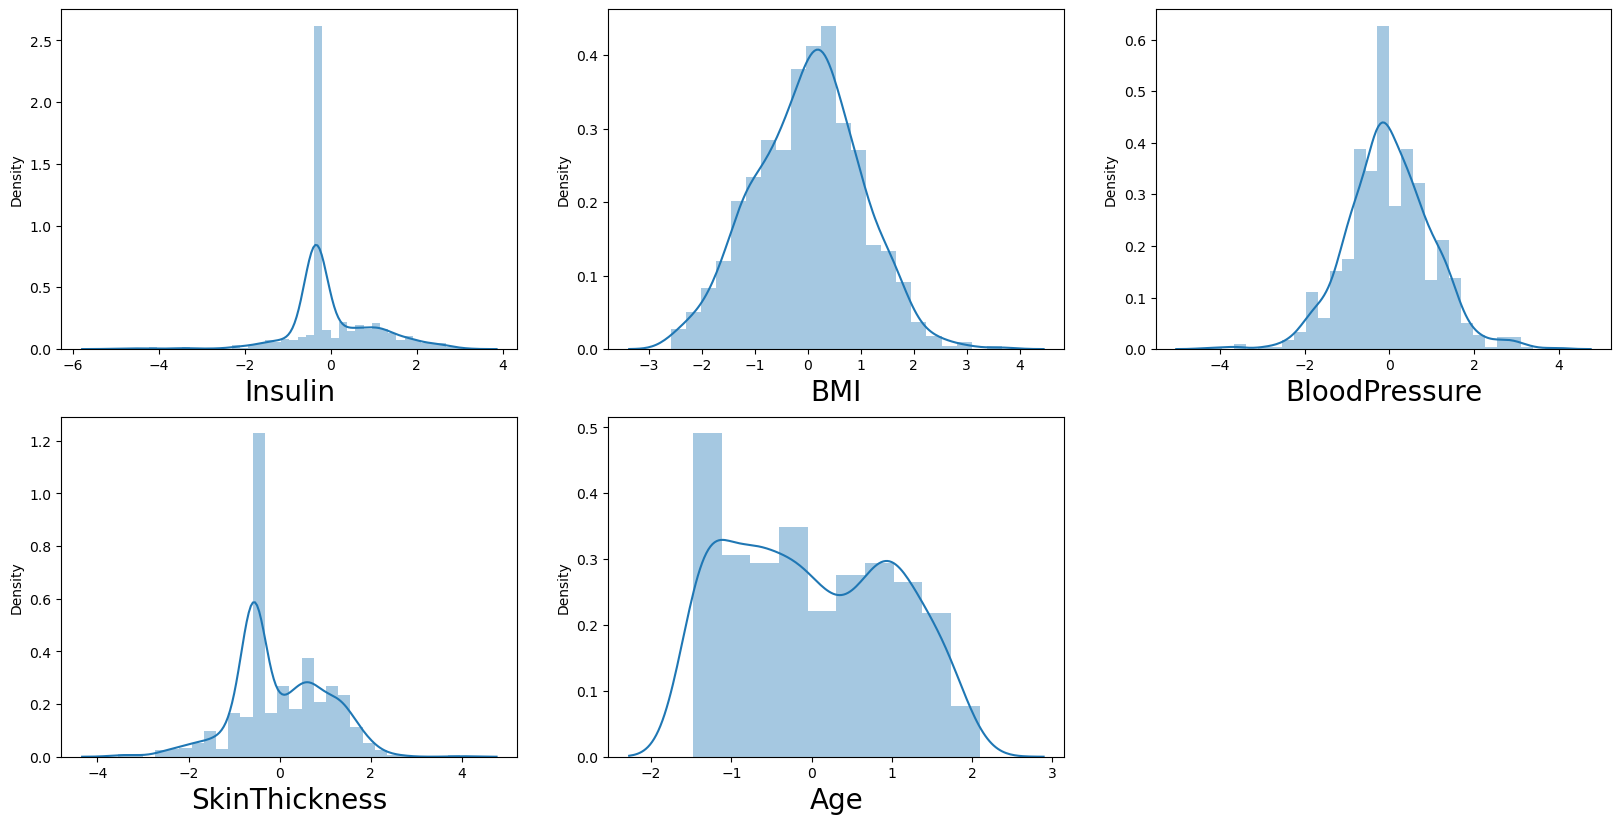

In [17]:
# let's see how data is distributed for every column after power transformer

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in data[features]:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
plt.show()